In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号


data=pd.read_csv('golbal.csv')
data

,时间,全球平均温度
0,1880,10.71444
1,1881,10.65444
2,1882,10.71444
3,1883,10.72444
4,1884,10.67444
...,...,...
138,2018,11.86444
139,2019,11.88444
140,2020,11.76444
141,2021,11.82444


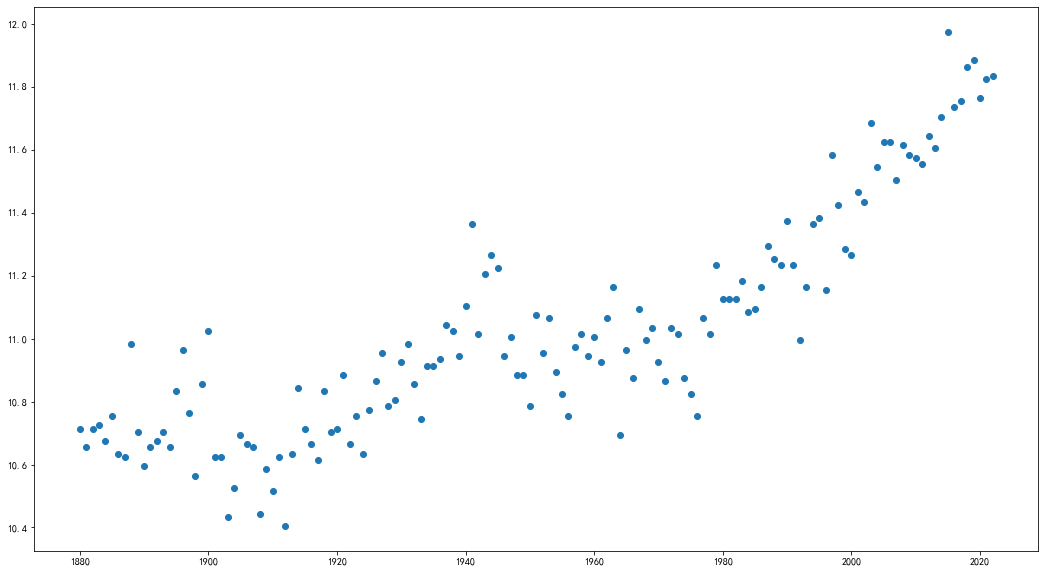

In [2]:
plt.figure(figsize=(18,10))
plt.scatter(data = data, x='时间',y = '全球平均温度')
plt.show()

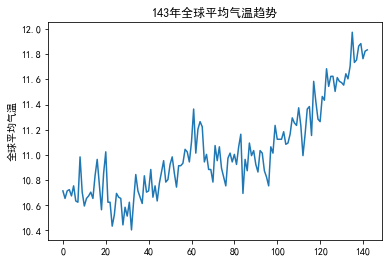

In [3]:
ax = data['全球平均温度'].plot()
ax.set(title="143年全球平均气温趋势", ylabel="全球平均气温")
plt.show()

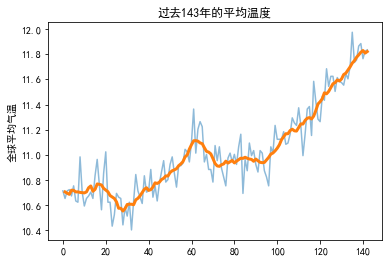

In [4]:
trend = data['全球平均温度'].rolling(
    window=10,
    center=True,
    min_periods=6,
).mean()

ax = data['全球平均温度'].plot(alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
ax.set(title="过去143年的平均温度", ylabel="全球平均气温")
plt.show()

In [5]:
data2=data.set_index('时间')
data2

,全球平均温度
时间,
1880,10.71444
1881,10.65444
1882,10.71444
1883,10.72444
1884,10.67444
...,...
2018,11.86444
2019,11.88444
2020,11.76444


In [6]:
from pmdarima.model_selection import train_test_split as time_train_test_split
# 训练拆分
X = data2['全球平均温度']
train_pjme, test_pjme = time_train_test_split(X, test_size=int(len(data2)*0.2))

train_pjme = pd.DataFrame(train_pjme)
test_pjme = pd.DataFrame(test_pjme)

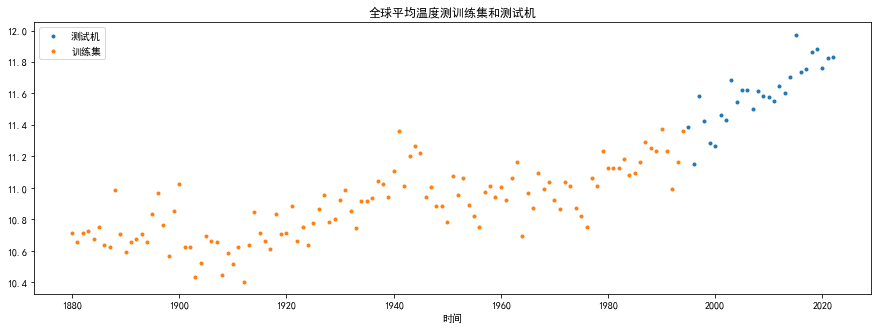

In [7]:
# 可视化训练集和测试机
Overview_Train_Test_Data = test_pjme \
    .rename(columns={'全球平均温度': '测试机'}) \
    .join(train_pjme.rename(columns={'全球平均温度': '训练集'}), how='outer') \
    .plot(figsize=(15,5), title='全球平均温度测训练集和测试机', style='.')

In [8]:
data2['全球平均温度'].rolling(window=12).mean()

时间
1880          NaN
1881          NaN
1882          NaN
1883          NaN
1884          NaN
          ...    
2018    11.676107
2019    11.707773
2020    11.720273
2021    11.740273
2022    11.761940
Name: 全球平均温度, Length: 143, dtype: float64

In [9]:
value=pd.DataFrame(data2['全球平均温度'])

temp_df=pd.concat([value,data2['全球平均温度'].rolling(window=12).mean()],axis=1)

temp_df.columns=['actual_temp','forecast_temp']
temp_df.head(12)

,actual_temp,forecast_temp
时间,,
1880,10.71444,NaN
1881,10.65444,NaN
1882,10.71444,NaN
1883,10.72444,NaN
1884,10.67444,NaN
1885,10.75444,NaN
1886,10.63444,NaN
1887,10.62444,NaN
1888,10.98444,NaN


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(temp_df['forecast_temp'][11:],temp_df['actual_temp'][11:]))

0.13874647370166354

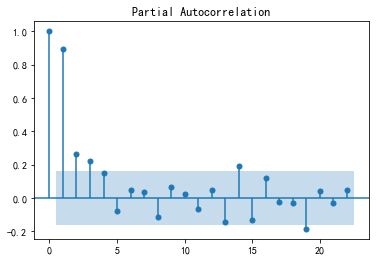

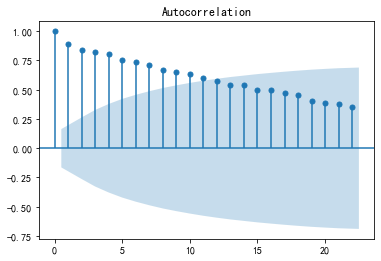

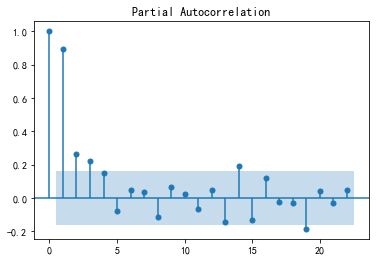

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(data2['全球平均温度'].dropna())

plot_pacf(data2['全球平均温度'].dropna())

In [15]:
data2

,全球平均温度
时间,
1880,10.71444
1881,10.65444
1882,10.71444
1883,10.72444
1884,10.67444
...,...
2018,11.86444
2019,11.88444
2020,11.76444


In [16]:
training_data=data2[0:130]
test_data = data2[130:]

from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(training_data,order=(12,1,5))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecast

In [17]:
# 训练模型
model= arima.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [19]:
#预测
predictions=model.forecast(steps=len(test_data))[0]

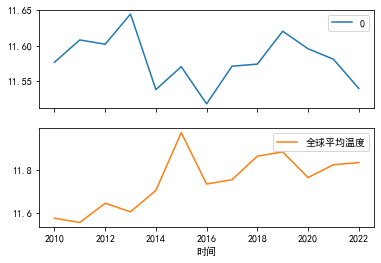

In [20]:
pd.Series(predictions).to_frame().set_index(test_data.index).join(test_data).plot(subplots=True)
plt.show()

In [21]:
pd.Series(predictions).to_frame().set_index(test_data.index)

,0
时间,
2010,11.576749
2011,11.608244
2012,11.602231
2013,11.644692
2014,11.538324
2015,11.570663
2016,11.518253
2017,11.571300
2018,11.574232


In [25]:
data3=pd.read_excel('测试数据.xlsx')
data3

,年份,气温
0,2050,NaN
1,2100,NaN


In [27]:
#预测
predictions2=model.forecast(steps=len(data3))[0]
pd.Series(predictions2).to_frame().set_index(data3.index)

,0
0,11.576749
1,11.590296


说明2050和2100年达不到20度